Run this in a terminal to make sure the shared folder is mounted (only at the beginning when booting up the VM.)

    sudo mount -t vboxsf -o uid=$UID,gid=$(id -g) simulation_results ~/Documents/sf_simulation_results/

In [11]:
%%bash
cd ../chaste_build/
make CartilageSheetSimulation

[  5%] Built target timekeeper
[ 11%] Built target chaste_global
[ 11%] Built target chaste_linalg
[ 16%] Built target chaste_io
[ 27%] Built target chaste_ode
[ 44%] Built target chaste_mesh
[ 44%] Built target chaste_pde
[ 88%] Built target chaste_cell_based
Scanning dependencies of target chaste_project_cartilage
[ 88%] Building CXX object projects/cartilage/CMakeFiles/chaste_project_cartilage.dir/src/population/division_rules/OrientationBasedDivisionRule.cpp.o
[ 88%] Linking CXX shared library libchaste_project_cartilage.so
[100%] Built target chaste_project_cartilage
[100%] Linking CXX executable CartilageSheetSimulation
[100%] Built target CartilageSheetSimulation


In [2]:
import sys
sys.path.append('analysis')

import numpy as np
import time 
import matplotlib.pyplot as plt
import distribute_executable as de
import sheet_metrics as sm

plt.style.use('seaborn-whitegrid')
#plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'font.size': 12}
plt.rcParams.update(params)

#### Let's try and see
We set
- lower and upper rigid boundaries
- lower and upper perichondrial layer
- chondrocyte layers in between, nicely stacked at cartesian coordinates, filling the space between the rigid boundaries
- repulsion only
- oriented cell division
- clonal patch size maximum to 4 cells 

In [16]:
output_directory = 'exp-intercalation/' + time.strftime("%Y%m%d-%H%M%S") +'/'
flags = ' --sbt' # synchronized birth times
flags = flags + ' --T 80.0' # final time 80h
flags = flags + ' --sw 8' # 8 cells in x direction
flags = flags + ' --sd 8' # 8 cells in y direction
flags = flags + ' --sh 4' # 4 cells in z direction
flags = flags + ' --pu 1' # 1 layer perichondrial cells above
flags = flags + ' --pl 1' # 1 layer perichondrial cells below
flags = flags + ' --nb 2' # both an upper and a lower rigid boundary
flags = flags + ' --mu 0.0' # adhesive spring stiffness set to 0 -> repulsion only
flags = flags + ' --A 0.25' # 25% of stem cells activated
flags = flags + ' --F pwq' # PWQ force
flags = flags + ' --mu_R 20.0' # set repulsive spring stiffness to 20.0
flags = flags + ' --p 0.0' # set perturbation to 0
flags = flags + ' --psl 4'
flags = flags + ' --u 3.5' # set distance between boundaries to 3.5
flags = flags + ' --cg ' # use a Cartesian grid for initial placement
flags = flags + ' --sc 2.0' # scale initial sheet to generate more space
flags = flags + ' --g1t 10.0'
flags = flags + ' --ds 3.0'

#flags = flags + ' --rdd' #random division directions

executable='/home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation'

In [17]:
de.run_simulations_multiple_random_seeds(output_directory, flags=flags, number_of_simulations=6, executable=executable)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200507-094756/ --S 0 --sbt --T 80.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 20.0 --p 0.0 --psl 4 --u 3.5 --cg  --sc 2.0 --g1t 10.0 --ds 3.0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200507-094756/ --S 1 --sbt --T 80.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 20.0 --p 0.0 --psl 4 --u 3.5 --cg  --sc 2.0 --g1t 10.0 --ds 3.0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200507-094756/ --S 2 --sbt --T 80.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 20.0 --p 0.0 --psl 4 --u 3.5 --cg  --sc 2.0 --g1t 10.0 --ds 3.0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/ap

In [18]:
de.run_postprocessing_multiple_random_seeds(6, output_directory)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-intercalation/20200507-094756/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-intercalation/20200507-094756/1/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-intercalation/20200507-094756/2/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-intercalation/20200507-094756/3/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-intercalation/20200507-094756/4/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-intercalation/20200507-094756/5/results_from_time_0/']
Starting postprocessing with 2 processes


analysis/sheet_metrics.py:104: RuntimeWarning: All-NaN slice encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:104: RuntimeWarning: All-NaN axis encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:105: RuntimeWarning: All-NaN slice encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.nanmin(coordinates[:,1::3], axis=1))
analysis/sheet_metrics.py:105: RuntimeWarning: All-NaN axis encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.nanmin(coordinates[:,1::3], axis=1))
analysis/sheet_metrics.py:106: RuntimeWarning: All-NaN slice encountered
  width[:, 2] = abs(np.nanmax(coordinates[:,2::3], axis=1)- np.nanmin(coordinates[:,2::3], axis=1))
analysis/sheet_metrics.py:104: RuntimeWarning: All-NaN slice encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.n

## First without scaling

Data archive: 
- 6 random seeds (0--5), patch size limit of 6 cells:
      nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200331-173524/ --S 0 --sbt --T 80.0 --sw 8 --sd 8 --sh 6 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 80.0 --p 0.1 --u 5.0 --cg 

Text(0,0.5,'Average patch projection area')

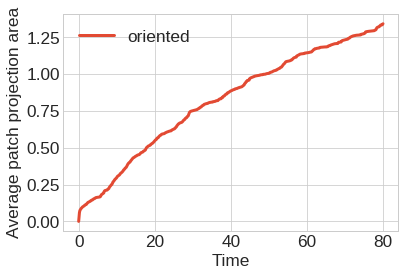

In [9]:
dir_directed = 'exp-intercalation/20200331-173524/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(6):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /6


plt.plot(times_d, ppa_av_d, label='oriented')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

## With scaling

- 6 random seeds (0--5):
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200416-093848/ --S 0 --sbt --T 80.0 --sw 8 --sd 8 --sh 6 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 80.0 --p 0.1 --psl 4 --u 3.5 --cg  --sc 1.25
- 6 random seeds
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200424-145856/ --S 0 --sbt --T 80.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 20.0 --p 0.1 --psl 4 --u 3.5 --cg  --sc 1.5 --g1t 10.0 --ds 3.0
- 6 random seeds
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200424-151029/ --S 0 --sbt --T 80.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 20.0 --p 0.1 --psl 4 --u 3.5 --cg  --sc 2.0 --g1t 10.0 --ds 3.0
    

Text(0,0.5,'Average patch projection area')

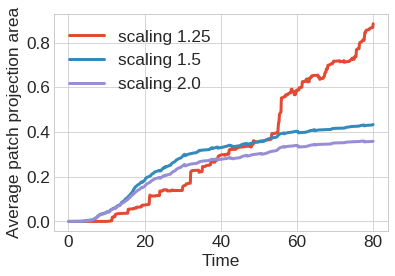

In [10]:
dir_directed = 'exp-intercalation/20200416-093848/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(6):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /6


plt.plot(times_d, ppa_av_d, label='scaling 1.25')

dir_directed = 'exp-intercalation/20200424-145856/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(6):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /6


plt.plot(times_d, ppa_av_d, label='scaling 1.5')

dir_directed = 'exp-intercalation/20200424-151029/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(6):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /6


plt.plot(times_d, ppa_av_d, label='scaling 2.0')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

## With perichondrial cells not moving backwards when dividing

Data:

- 6 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200506-162036/ --S 0 --sbt --T 80.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 20.0 --p 0.1 --psl 4 --u 3.5 --cg  --sc 2.0 --g1t 10.0 --ds 3.0

Text(0,0.5,'Average patch projection area')

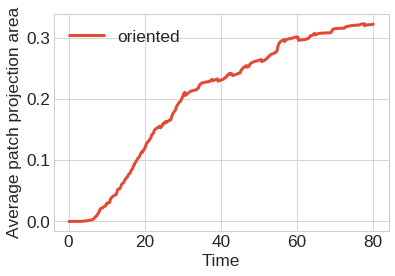

In [6]:
dir_directed = 'exp-intercalation/20200506-162036/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(6):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /6


plt.plot(times_d, ppa_av_d, label='oriented')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

Hmm, so far only slight improvement. I think the main reason for this is that the new chondrocyte is still overlapping with the old column due to the initial separation being smaller than the cell radius. It should help if the cells did not overlap at all after division.

## With the daughter cells of a perichondrial cell not overlapping after division

Data:

- 6 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200507-092305/ --S 0 --sbt --T 80.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 20.0 --p 0.1 --psl 4 --u 3.5 --cg  --sc 2.0 --g1t 10.0 --ds 3.0

Text(0,0.5,'Average patch projection area')

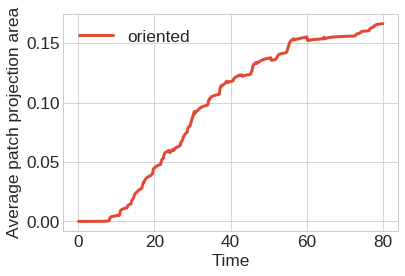

In [15]:
dir_directed = 'exp-intercalation/20200507-092305/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(6):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /6


plt.plot(times_d, ppa_av_d, label='oriented')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

## Without perturbation of the initial configuration

Data:
- 6 random seeds:
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200507-094756/ --S 0 --sbt --T 80.0 --sw 8 --sd 8 --sh 4 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 20.0 --p 0.0 --psl 4 --u 3.5 --cg  --sc 2.0 --g1t 10.0 --ds 3.0

Text(0,0.5,'Average patch projection area')

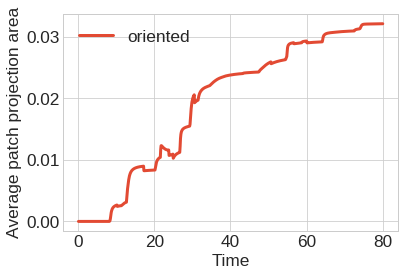

In [19]:
dir_directed = 'exp-intercalation/20200507-094756/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(6):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /6


plt.plot(times_d, ppa_av_d, label='oriented')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')